<a href="https://colab.research.google.com/github/ARSHITHbabu/VegTracker-Landsat-Analysis/blob/main/VegTracker_Landsat_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***1) Install necessary libraries***

In [11]:
!pip install geopandas rasterio folium matplotlib numpy


## ***2) Import Libraries***

In [12]:
import os
import numpy as np
import rasterio
import folium
import matplotlib.pyplot as plt


## ***3) Define the Image Folder and Check Contents***

In [13]:
image_folder = "/content/drive/MyDrive/Environmental Impact Analysis with Satellite Data/EO_Browser_images (1)"

print("Contents of the folder:", os.listdir(image_folder))


Contents of the folder: ['B04_01.tiff', 'B05_01.tiff', 'B04_02.tiff', 'B05_02.tiff', 'B05_03.tiff', 'B04_03.tiff', 'B04_04.tiff', 'B05_04.tiff', 'B04_05.tiff', 'B05_05.tiff', 'B04_06.tiff', 'B05_06.tiff', 'B05_07.tiff', 'B04_07.tiff', 'B04_08.tiff', 'B05_08.tiff', 'B04_09.tiff', 'B05_09.tiff', 'B04_11.tiff', 'B04_10.tiff', 'B05_10.tiff', 'B05_11.tiff', 'B04_12.tiff', 'B05_12.tiff', 'B05_13.tiff', 'B04_13.tiff', 'B04_14.tiff', 'B05_14.tiff']


## ***4) Identify Red and NIR Band Files***

In [14]:
red_files = [f for f in os.listdir(image_folder) if 'B04' in f]
nir_files = [f for f in os.listdir(image_folder) if 'B05' in f]

red_files.sort()
nir_files.sort()

print("Red band files:", red_files)
print("NIR band files:", nir_files)


Red band files: ['B04_01.tiff', 'B04_02.tiff', 'B04_03.tiff', 'B04_04.tiff', 'B04_05.tiff', 'B04_06.tiff', 'B04_07.tiff', 'B04_08.tiff', 'B04_09.tiff', 'B04_10.tiff', 'B04_11.tiff', 'B04_12.tiff', 'B04_13.tiff', 'B04_14.tiff']
NIR band files: ['B05_01.tiff', 'B05_02.tiff', 'B05_03.tiff', 'B05_04.tiff', 'B05_05.tiff', 'B05_06.tiff', 'B05_07.tiff', 'B05_08.tiff', 'B05_09.tiff', 'B05_10.tiff', 'B05_11.tiff', 'B05_12.tiff', 'B05_13.tiff', 'B05_14.tiff']


## ***5) Define NDVI Threshold and Initialize Map***

In [15]:
ndvi_threshold = 0.2

deforestation_map = folium.Map(location=[22.5, 78.9], zoom_start=5)

ndvi_values = {}


## ***6) Process Each Red-NIR Pair***

In [16]:
for red_file, nir_file in zip(red_files, nir_files):
    red_path = os.path.join(image_folder, red_file)
    nir_path = os.path.join(image_folder, nir_file)

    try:
        with rasterio.open(red_path) as red:
            red_band = red.read(1).astype(float)

        with rasterio.open(nir_path) as nir:
            nir_band = nir.read(1).astype(float)

            ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-10)

            ndvi_values[red_file] = ndvi

            deforestation_mask = ndvi < ndvi_threshold

            left, bottom, right, top = red.bounds

            folium.raster_layers.ImageOverlay(
                image=deforestation_mask.astype(np.uint8) * 255,
                bounds=[[bottom, left], [top, right]],
                opacity=0.5,
                name=f'Deforestation - {red_file}'
            ).add_to(deforestation_map)

            print(f"Processed {red_file} and {nir_file}")

    except Exception as e:
        print(f"Error processing {red_file} and {nir_file}: {e}")


Processed B04_01.tiff and B05_01.tiff
Processed B04_02.tiff and B05_02.tiff
Processed B04_03.tiff and B05_03.tiff
Processed B04_04.tiff and B05_04.tiff
Processed B04_05.tiff and B05_05.tiff
Processed B04_06.tiff and B05_06.tiff
Processed B04_07.tiff and B05_07.tiff
Processed B04_08.tiff and B05_08.tiff
Processed B04_09.tiff and B05_09.tiff
Processed B04_10.tiff and B05_10.tiff
Processed B04_11.tiff and B05_11.tiff
Processed B04_12.tiff and B05_12.tiff
Processed B04_13.tiff and B05_13.tiff
Processed B04_14.tiff and B05_14.tiff


## ***7) Add Layer Control and Save the Map***

In [17]:
folium.LayerControl().add_to(deforestation_map)
map_path = "/content/multiple_deforestation_map.html"
deforestation_map.save(map_path)

print(f"Map saved as: {map_path}")


Map saved as: /content/multiple_deforestation_map.html


## ***8) Visualize NDVI for All Images***

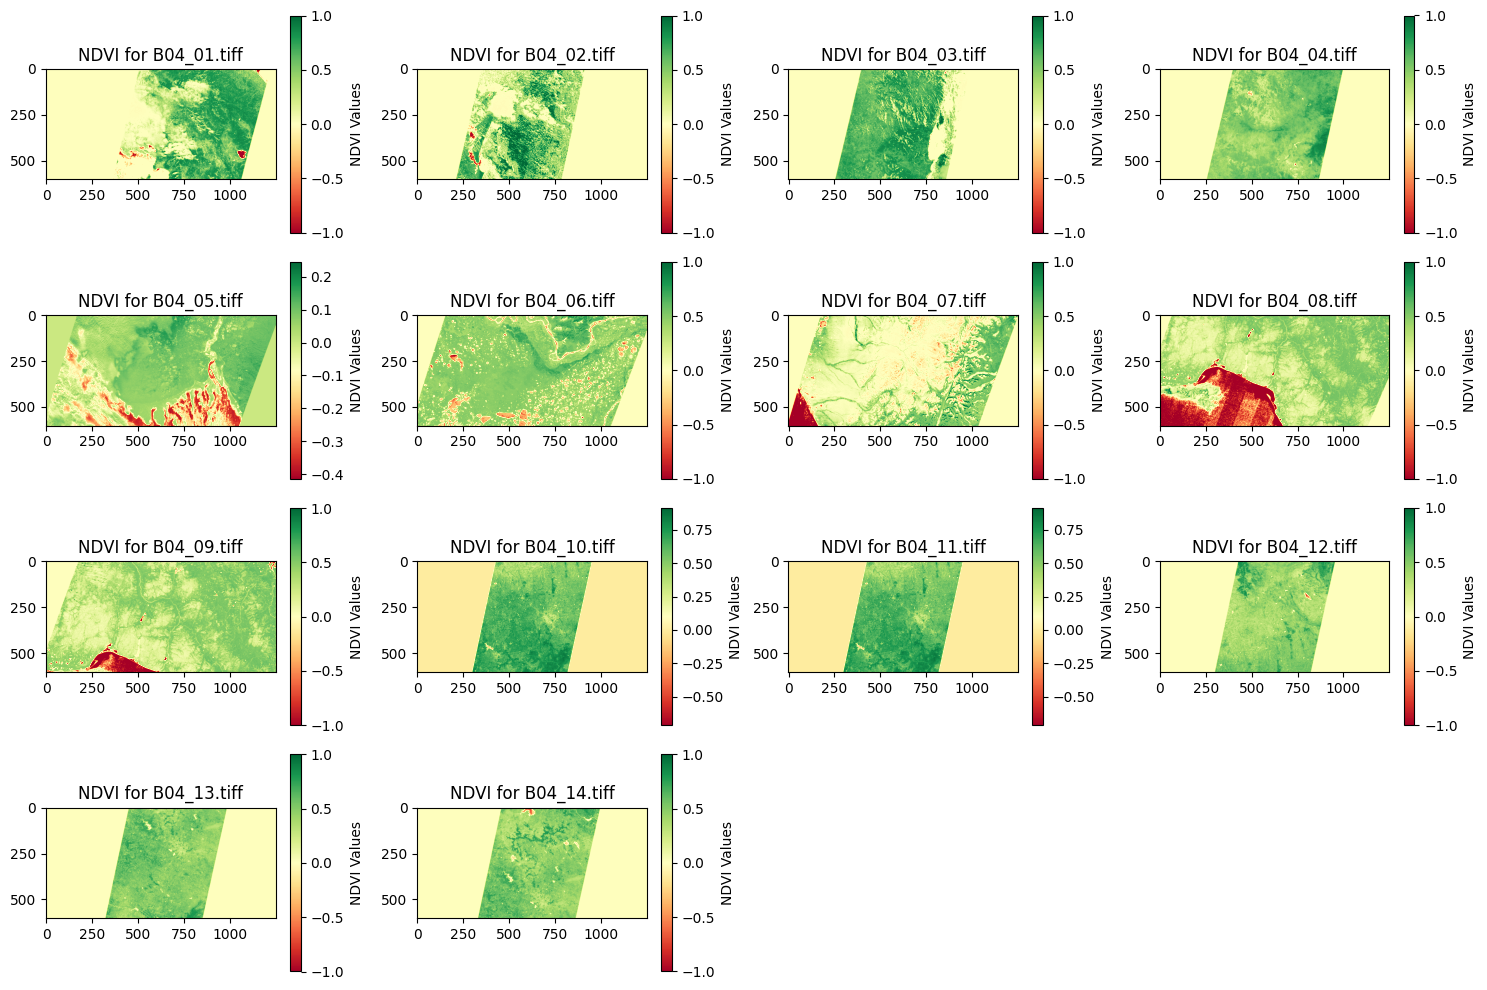

In [18]:
plt.figure(figsize=(15, 10))
num_images = len(ndvi_values)
num_cols = 4
num_rows = (num_images // num_cols) + (num_images % num_cols > 0)

for i, (red_file, ndvi) in enumerate(ndvi_values.items()):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI Values')
    plt.title(f'NDVI for {red_file}')
plt.tight_layout()
plt.show()
